# Support Vector Machine Assignment

### Task 1: Exploratory Data Analysis (EDA)
- Load the Mushroom dataset and perform fundamental data exploration.
- Utilize histograms, box plots, or density plots to understand feature distributions.
- Investigate feature correlations to discern relationships within the data.


In [3]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['figure.figsize']=(20,12)
plt.rcParams['figure.dpi']=400
sns.set_style('darkgrid')

In [4]:
# Load the Mushroom dataset
df = pd.read_csv("https://raw.githubusercontent.com/snehuuu28/Excelr_Data_Science/main/Assignments/Assignment_17/mushroom.csv",index_col=0)

In [ ]:
df

In [5]:
# Display basic information about the dataset
print("Dataset Loaded Successfully!")
df.info()

Dataset Loaded Successfully!
<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 1167 to 1073
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   cap_shape                 2000 non-null   object 
 1   cap_surface               2000 non-null   object 
 2   cap_color                 2000 non-null   object 
 3   bruises                   2000 non-null   object 
 4   odor                      2000 non-null   object 
 5   gill_attachment           2000 non-null   object 
 6   gill_spacing              2000 non-null   object 
 7   gill_size                 2000 non-null   object 
 8   gill_color                2000 non-null   object 
 9   stalk_shape               2000 non-null   object 
 10  stalk_root                2000 non-null   object 
 11  stalk_surface_above_ring  2000 non-null   object 
 12  stalk_surface_below_ring  2000 non-null   object 
 13  stalk_color_above_ring    2000 non-n

In [6]:
# Check for missing values
print("Missing Values in Dataset:")
print(df.isnull().sum())

Missing Values in Dataset:
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64


In [7]:
df.describe()

,stalk_height,cap_diameter
count,2000.000000,2000.000000
mean,8.449118,12.314345
std,3.697217,7.048845
min,2.000000,1.000000
25%,5.291009,5.723521
50%,8.318596,12.124902
75%,11.781272,18.698605
max,15.095066,25.000054


In [8]:
df.shape

(2000, 25)

### Task 2: Data Preprocessing
- Encode categorical variables if necessary.
- Split the dataset into training and testing sets.


In [10]:
# Encode categorical variables using LabelEncoder
label_encoder = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = label_encoder.fit_transform(df[col])

In [11]:
# Splitting data into features and target variable
x = df.drop(columns='class')
y = df['class']

In [12]:
# Splitting data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=1)
print("Data split into training and testing sets.")

Data split into training and testing sets.


### Task 3: Data Visualization
- Employ scatter plots, pair plots, or relevant visualizations to comprehend feature distributions and relationships.
- Visualize class distributions to gauge dataset balance or imbalance.

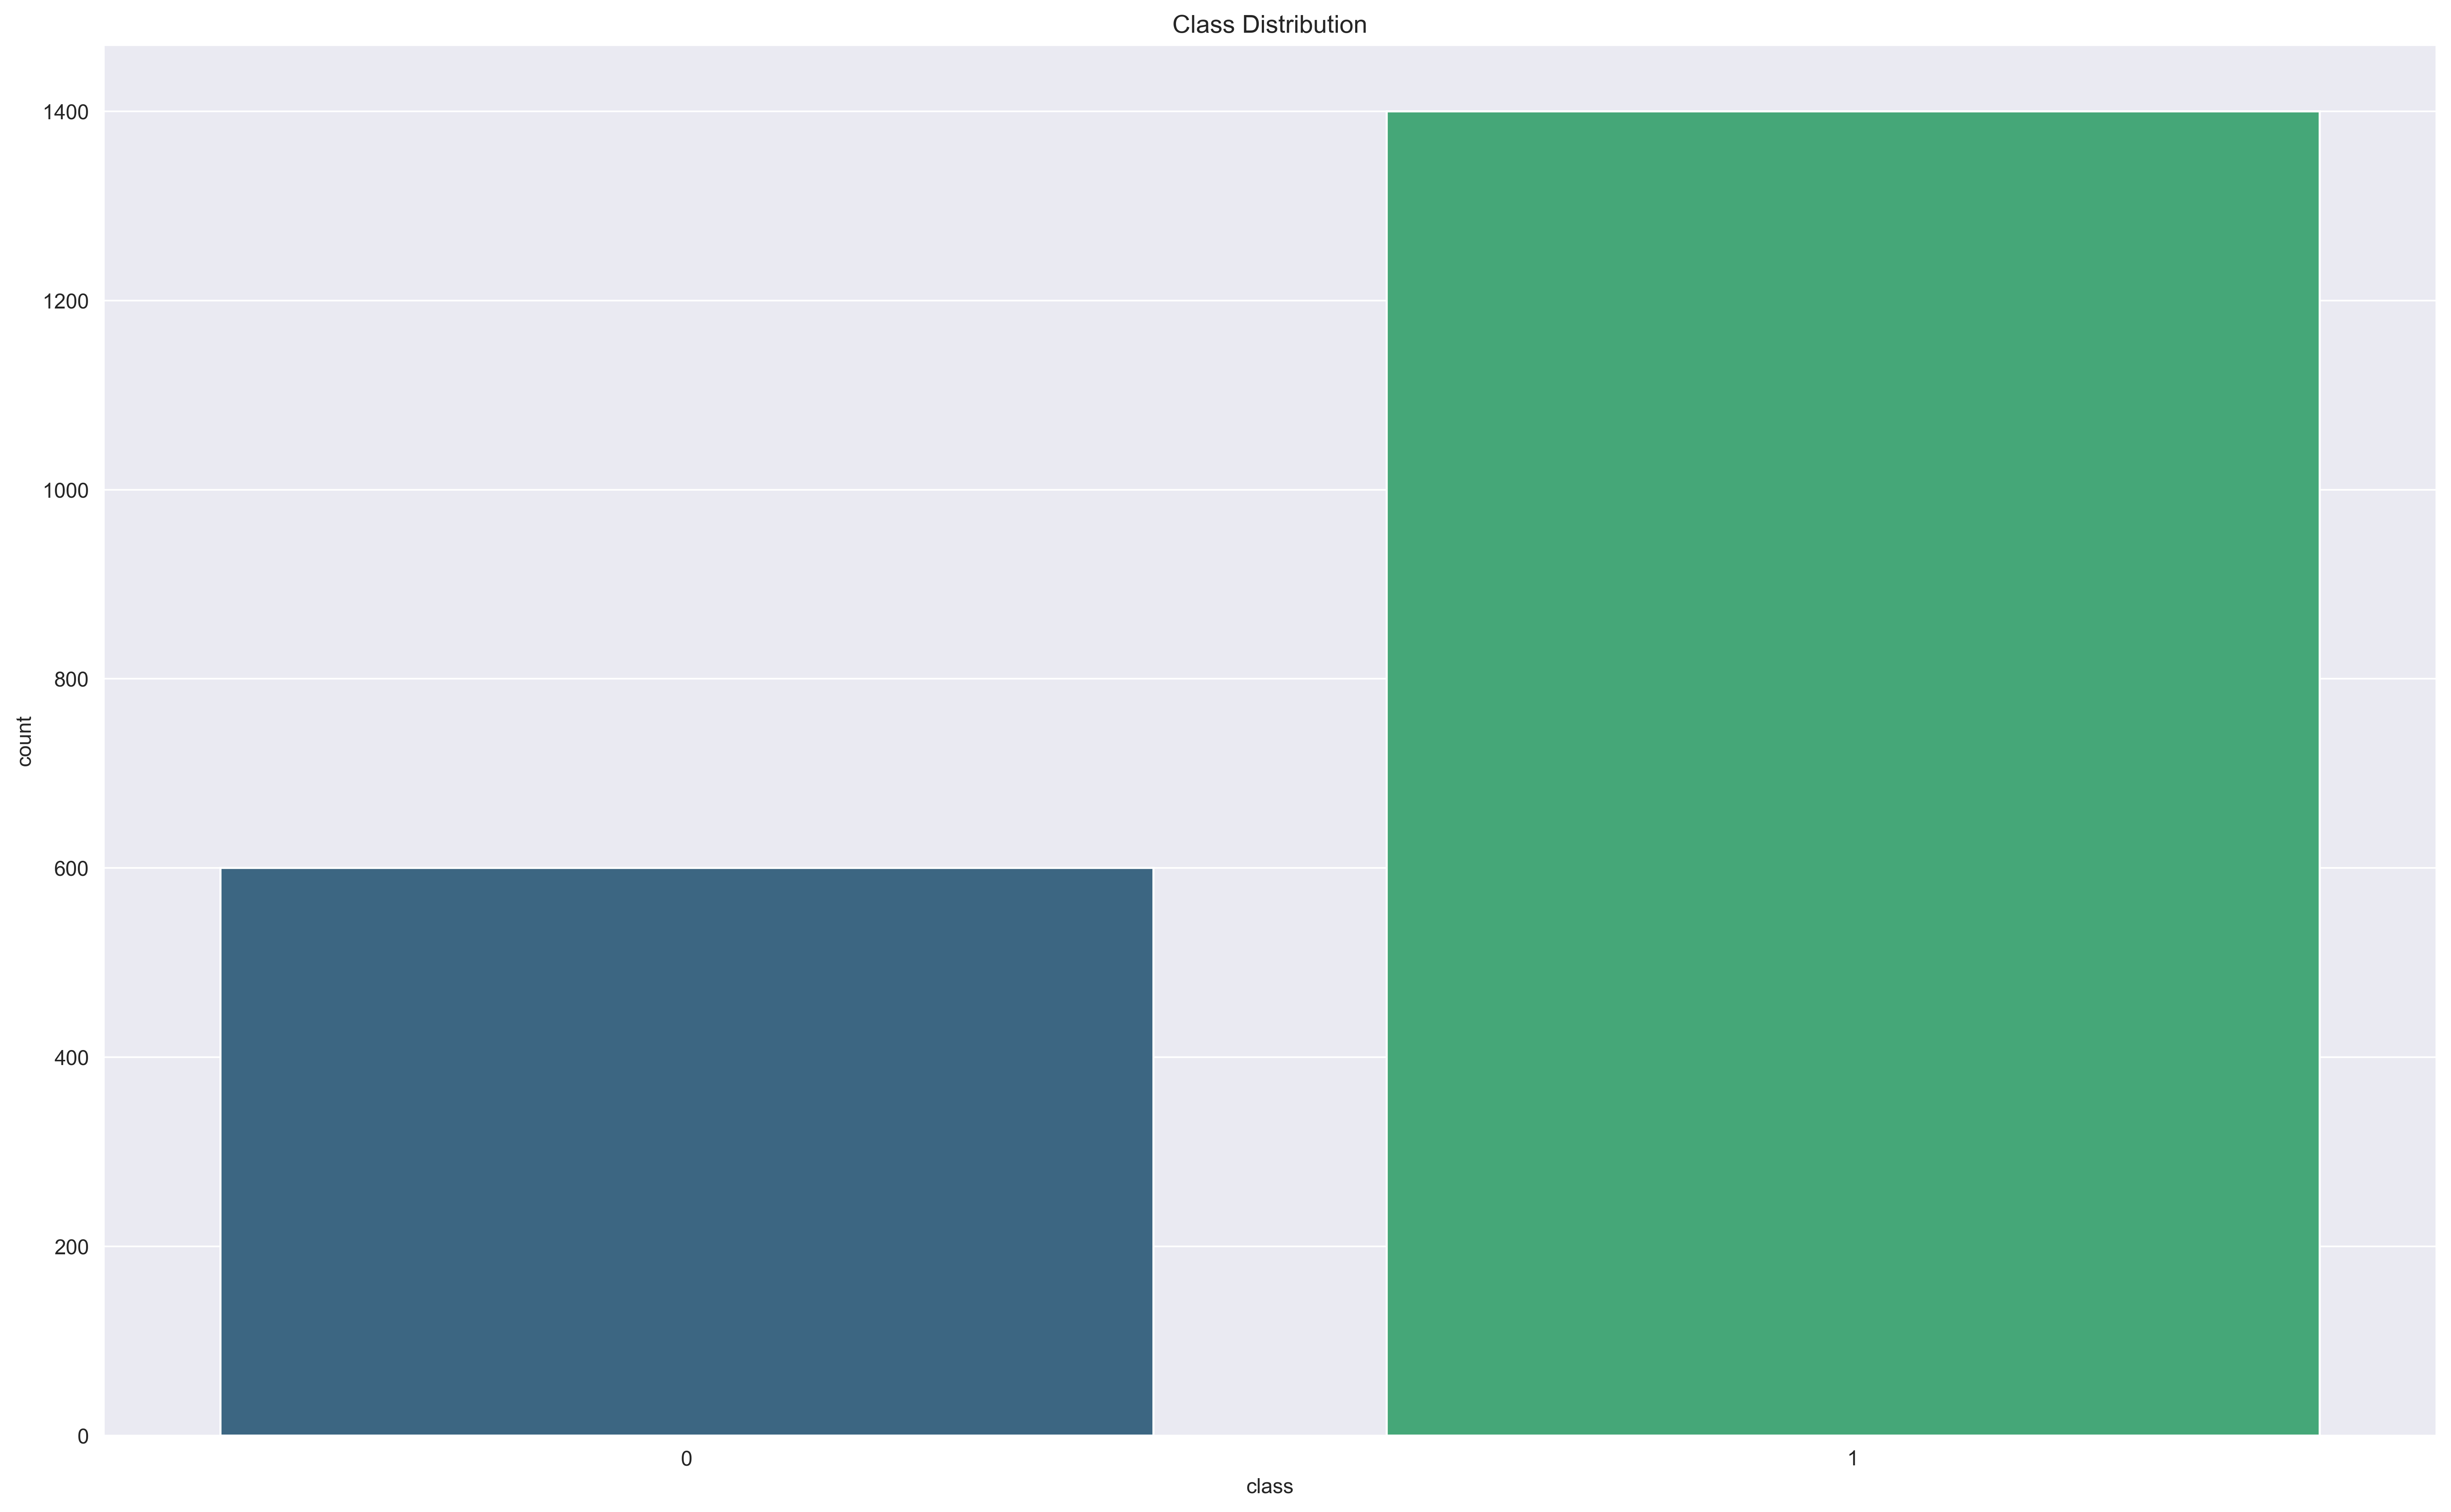

In [14]:
# Visualizing class distribution
sns.countplot(x='class', data=df, palette='viridis')
plt.title("Class Distribution")
plt.show()

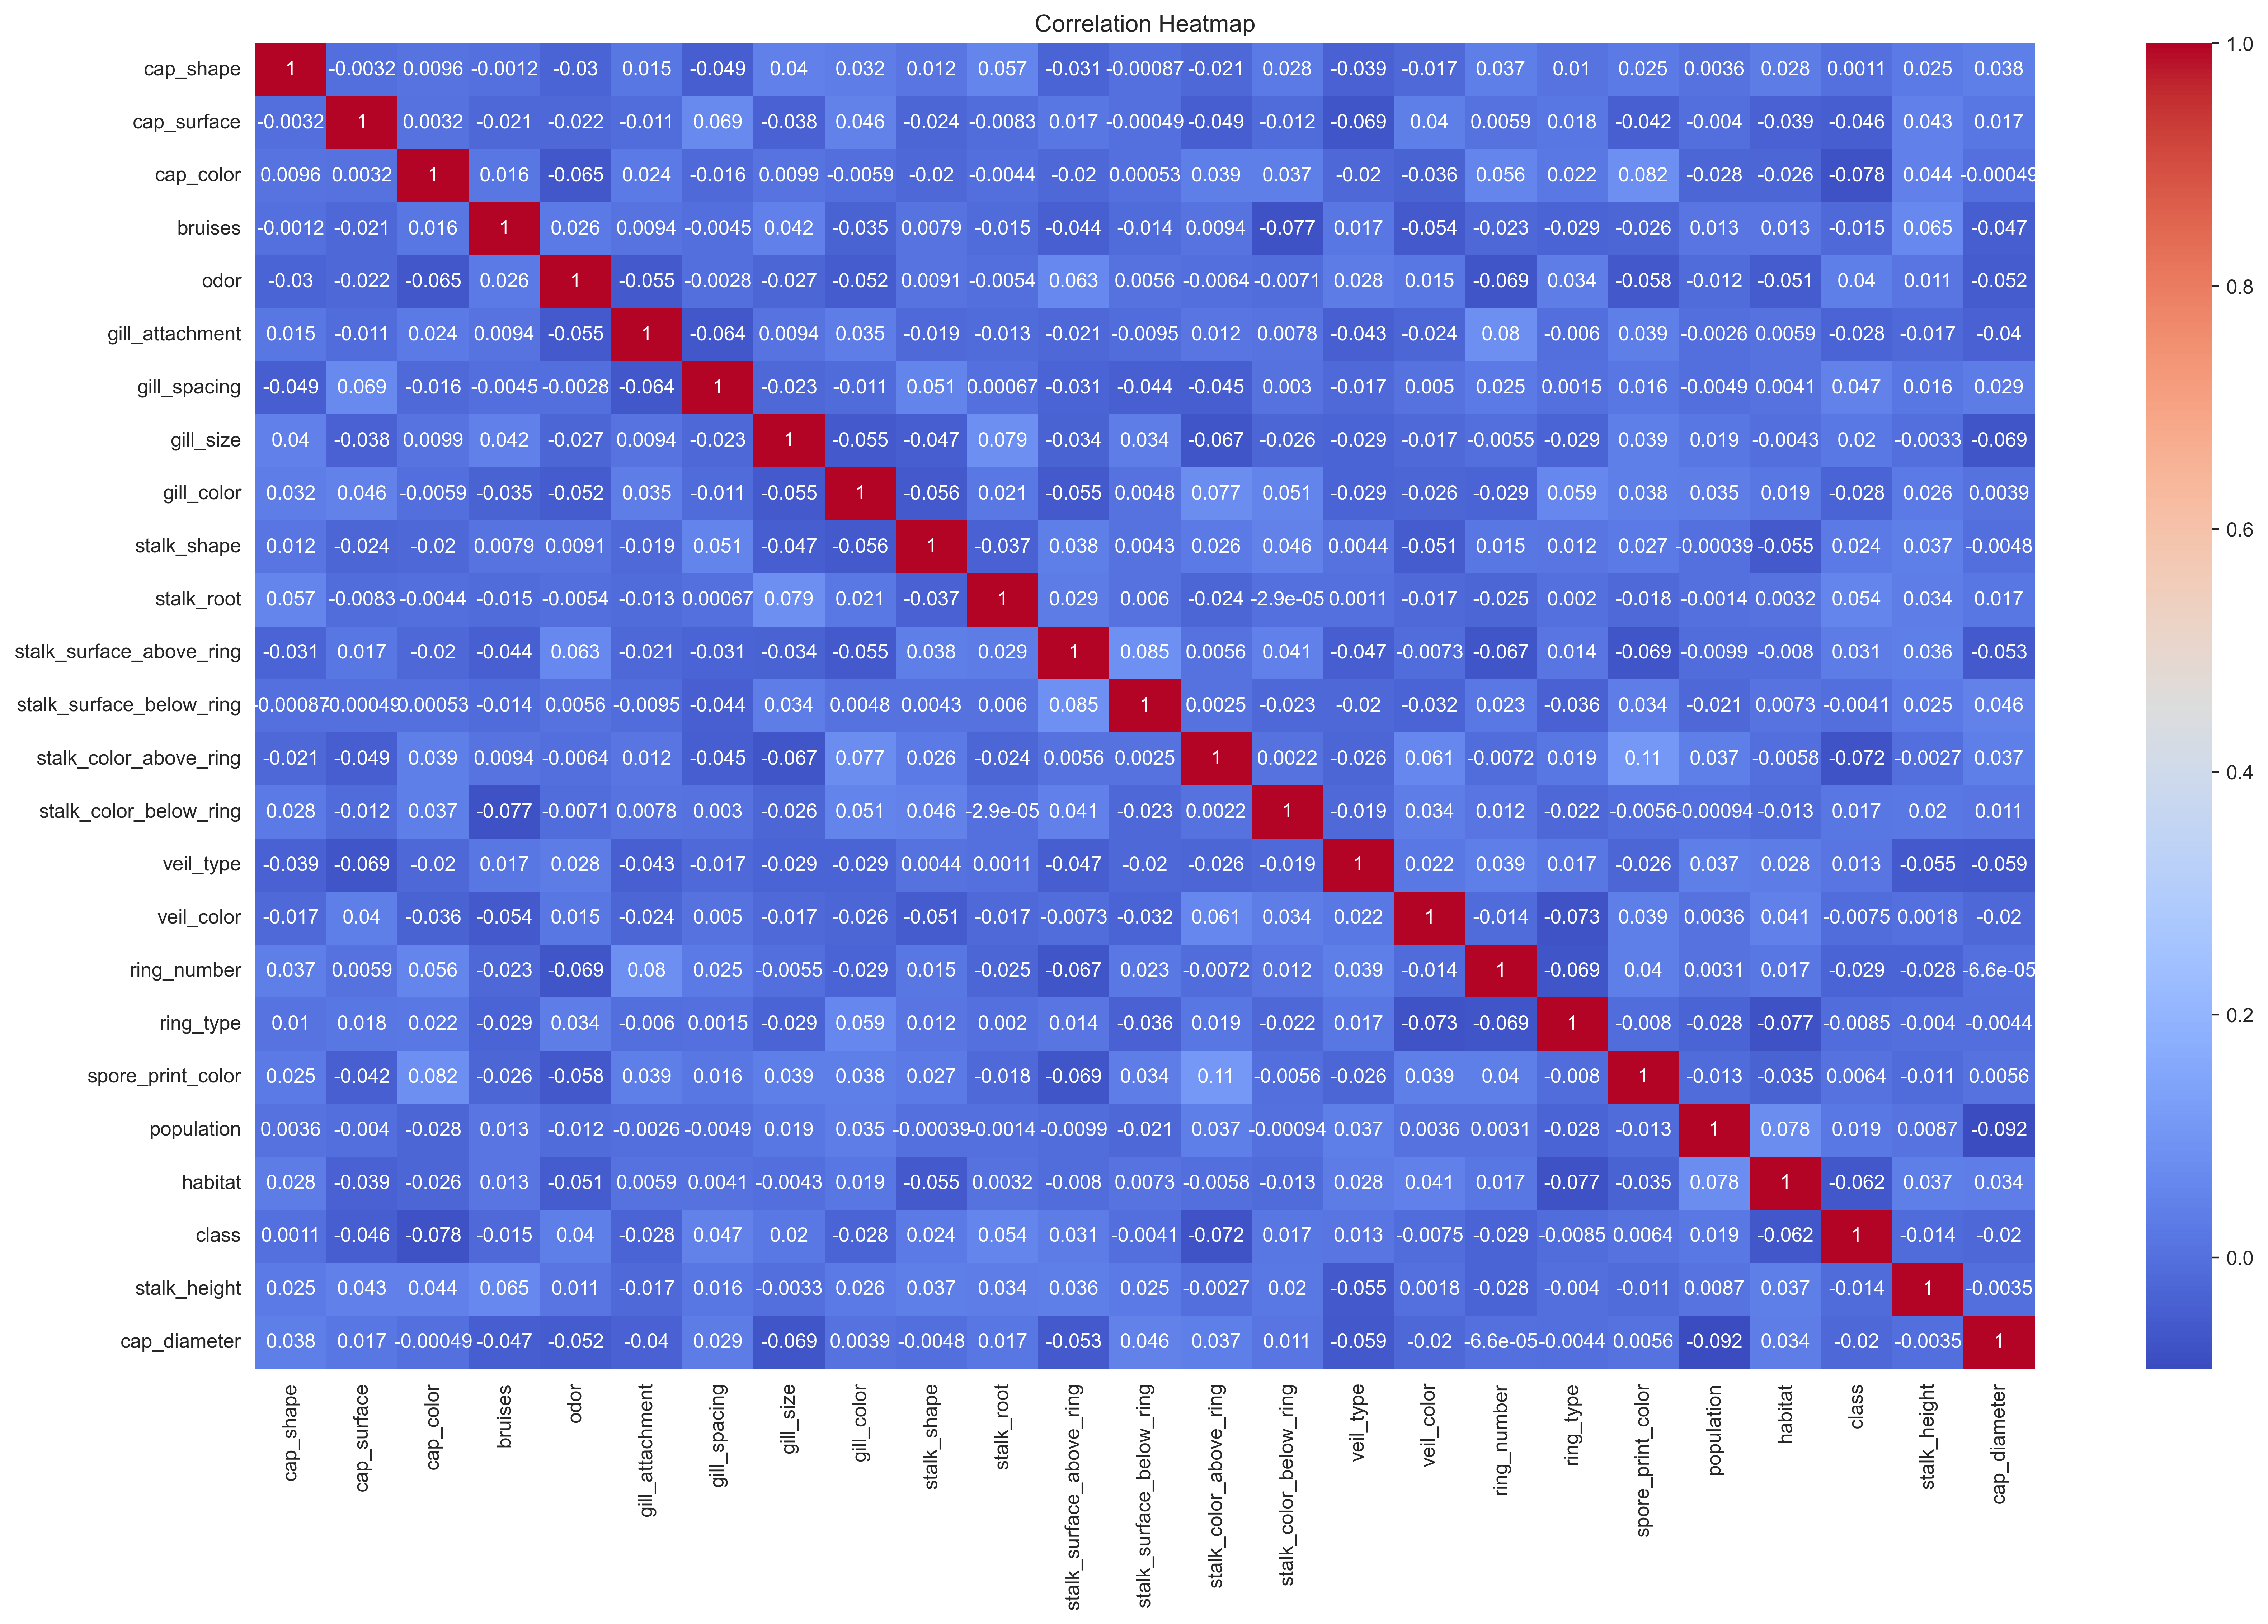

In [15]:
# Investigating correlations 
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

### Task 4: SVM Implementation
- Implement a basic SVM classifier using Python libraries like scikit-learn.
- Train the SVM model on the training data.
- Evaluate model performance on the testing data using appropriate metrics.

In [17]:
svc = SVC()
svc.fit(xtrain,ytrain)
ypred = svc.predict(xtest)
print(svc.score(xtrain,ytrain))
print(svc.score(xtest,ytest))

0.705625
0.69


- Despite the fact, that SVC works like magic when it comes to classification,still the accuracy is very bad and the model is overfitted.
- The reason is not performing feature scaling before model.
- As there is distance calculation involved in svc, Scaling is mandatory step!

In [19]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [20]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=0.2, random_state=1)

svc=SVC(kernel='linear')
svc.fit(xtrain,ytrain)
ypred = svc.predict(xtest)
print(svc.score(xtrain,ytrain))
print(svc.score(xtest,ytest))

0.7025
0.69


### Task 5: Visualization of SVM Results
- Visualize classification results on the testing data.

In [22]:
# Evaluate model performance
print("SVM Performance Metrics (Linear Kernel):")
print(classification_report(ytest, ypred))

SVM Performance Metrics (Linear Kernel):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       124
           1       0.69      1.00      0.82       276

    accuracy                           0.69       400
   macro avg       0.34      0.50      0.41       400
weighted avg       0.48      0.69      0.56       400



### Task 6: Parameter Tuning and Optimization
- Experiment with different SVM hyperparameters (e.g., kernel type, regularization parameter) to optimize performance.

In [24]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': [0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1]
}
grid_search = GridSearchCV(SVC(), param_grid, cv=5, verbose=1)
grid_search.fit(xtrain, ytrain)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             verbose=1)

### Task 7: Comparison and Analysis
- Compare SVM performance with various kernels.
- Analyze SVM strengths and weaknesses for the Mushroom dataset.
- Discuss practical implications of SVM in real-world classification tasks.


In [26]:
print("Best Parameters from Grid Search:", grid_search.best_params_)

Best Parameters from Grid Search: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [27]:
# Train SVM with the best parameters
best_model = grid_search.best_estimator_
best_model.fit(xtrain, ytrain)
y_pred_best = best_model.predict(xtest)

# Evaluate optimized model
print("Optimized SVM Performance Metrics:")
print(classification_report(ytest, y_pred_best))


Optimized SVM Performance Metrics:
              precision    recall  f1-score   support

           0       1.00      0.63      0.77       124
           1       0.86      1.00      0.92       276

    accuracy                           0.89       400
   macro avg       0.93      0.81      0.85       400
weighted avg       0.90      0.89      0.88       400



** Analysis of SVM Strengths and Weaknesses **
- Strengths:
Effective for binary classification problems: The Mushroom dataset is ideal as it consists of binary class labels (edible vs. poisonous).
Handles high-dimensional data well: SVM is robust even with many features or categorical data encoded into numerical values.
Versatile kernel functions: Allows transformation of non-linear problems into a linearly separable space.

- Weaknesses:
Feature scaling dependency: As noted, SVM performance improves significantly after applying scaling due to distance-based calculations.
Sensitive to hyperparameters: Choice of C, gamma, and kernel type greatly impacts performance.
- Computational cost: Training time increases significantly with large datasets, especially for kernels like RBF or Polynomial.

** Practical Implications of SVM **
- Applications:

- Healthcare: Used for disease diagnosis (e.g., cancer detection).
- Finance: Fraud detection and risk modeling.
- Text Classification: Spam detection and sentiment analysis.
- Manufacturing: Fault detection in quality control processes.

** Limitations: **

- May not be suitable for datasets with a large number of samples due to high computational cost.
- Requires careful tuning of hyperparameters for optimal performance